In [1]:
import urllib
import json
import numpy as np
import itertools
import torch
from os import listdir
import os
from os.path import isfile, join
import time
import requests
import json
import pickle
import base64
from io import BytesIO
from PIL import Image
from tqdm import tqdm

import cv2
from matplotlib import pyplot as plt

def find_image_by_id(id: int):
    for i in data['images']:
        if i['id'] == id:
            return i

f = open('fishial_collection_correct.json',)
data = json.load(f)
f.close()

bodyes_shapes_ids = []
for i in data['categories']:
    if i['name'] == 'General body shape':
        bodyes_shapes_ids.append(int(i['id']))

In [7]:
folder_name = "fishial_collection"
os.makedirs(folder_name, exist_ok=True)
os.makedirs("{}/Train".format(folder_name), exist_ok=True)
os.makedirs("{}/Test".format(folder_name), exist_ok=True)
list_sd = []
for i in tqdm(range(len(data['images']))):
    if 'train_data' not in data['images'][i]:
        continue
    list_sd.append(data['images'][i]['file_name'])
    folder_type = 'Train' if data['images'][i]['train_data'] else 'Test'
    path = os.path.join(os.path.join(folder_name, folder_type), data['images'][i]['file_name'])
    start_time = time.time()
    r = requests.get(data['images'][i]['coco_url'], allow_redirects=True)  # to get content after redirection
    with open(path, 'wb') as f:
        f.write(r.content)
    print("[FISHIAL] Request to fishial: {} path: {}".format(time.time() - start_time, path), end='\r')

 24%|██▍       | 2674/11050 [00:00<00:00, 17568.22it/s]

fishial_collection/Train/00000007.jpg
fishial_collection/Train/00000021.jpg
fishial_collection/Test/00000029.jpg
fishial_collection/Train/00000031.jpg
fishial_collection/Train/00000039.jpg
fishial_collection/Train/00000043.jpg
fishial_collection/Test/00000045.jpg
fishial_collection/Train/00000060.jpeg
fishial_collection/Train/00000061.jpeg
fishial_collection/Train/00004202.jpg
fishial_collection/Train/00004212.jpg
fishial_collection/Train/00004215.jpg
fishial_collection/Train/00004216.jpg
fishial_collection/Train/00004217.jpg
fishial_collection/Train/00004220.jpg
fishial_collection/Test/00004221.jpg
fishial_collection/Train/00004225.jpg
fishial_collection/Test/00004229.jpg
fishial_collection/Train/00004230.jpg
fishial_collection/Train/00004233.jpg
fishial_collection/Test/00004234.jpg
fishial_collection/Test/00004235.jpg
fishial_collection/Train/00004238.jpg
fishial_collection/Train/00004239.jpg
fishial_collection/Train/00004242.jpg
fishial_collection/Train/00004243.jpg
fishial_collecti

100%|██████████| 11050/11050 [00:00<00:00, 25447.37it/s]


fishial_collection/Train/00010709.jpg
fishial_collection/Train/00010710.jpg
fishial_collection/Train/00010711.jpg
fishial_collection/Train/00010712.jpg
fishial_collection/Train/00010715.jpg
fishial_collection/Test/00010716.jpg
fishial_collection/Test/00010717.jpg
fishial_collection/Train/00010718.jpg
fishial_collection/Test/00010719.jpg
fishial_collection/Train/00010720.jpg
fishial_collection/Train/00010721.jpg
fishial_collection/Train/00010722.jpg
fishial_collection/Train/00010723.jpg
fishial_collection/Train/00010724.jpg
fishial_collection/Test/00010725.jpg
fishial_collection/Train/00010726.jpg
fishial_collection/Train/00010727.jpg
fishial_collection/Train/00010728.jpg
fishial_collection/Train/00010729.jpg
fishial_collection/Train/00010730.jpg
fishial_collection/Test/00010731.jpeg
fishial_collection/Train/00010732.jpg
fishial_collection/Train/00010733.jpg
fishial_collection/Train/00010734.jpg
fishial_collection/Train/00010735.jpg
fishial_collection/Train/00010736.jpg
fishial_collect

In [81]:
def find_image_by_id(id: int):
    for i in data['images']:
        if i['id'] == id:
            return i

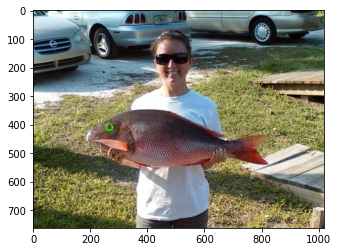

In [87]:
count_withount_poly = 0
for i in range(len(data['annotations'])):
    if len(data['annotations'][i]['segmentation'][0]) < 30:
        poly_gon = []
        for z in range(int(len(data['annotations'][i]['segmentation'][0])/2) - 1):
            poly_gon.append([data['annotations'][i]['segmentation'][0][z*2],
                             data['annotations'][i]['segmentation'][0][z*2 +1]])

        image_instance = find_image_by_id(data['annotations'][i]['image_id'])
        file_name = image_instance['file_name']
        img_path = image_instance['coco_url']
        r = requests.get(img_path, allow_redirects=True)  # to get content after redirection
        with open(file_name, 'wb') as f:
            f.write(r.content)
        count_withount_poly += 1
        image = cv2.cvtColor(cv2.imread(file_name), cv2.COLOR_BGR2RGB)
        poly_gon_transf = np.array([poly_gon], np.int32)
        cv2.polylines(image, [poly_gon_transf], True, (0,255,0), thickness=3)

        cv2.imshow('Check', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
# print(count_withount_poly)

In [52]:
#Import image
image = cv2.imread("input_path")
#Show the image with matplotlib
plt.imshow(image)
plt.show()

{'image_id': 74, 'caption': 'Test Image'}